In [1]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


played_hours,age
<dbl>,<dbl>
30.3,9
3.8,17
0.7,21
0.1,21
0.1,17
1.6,23


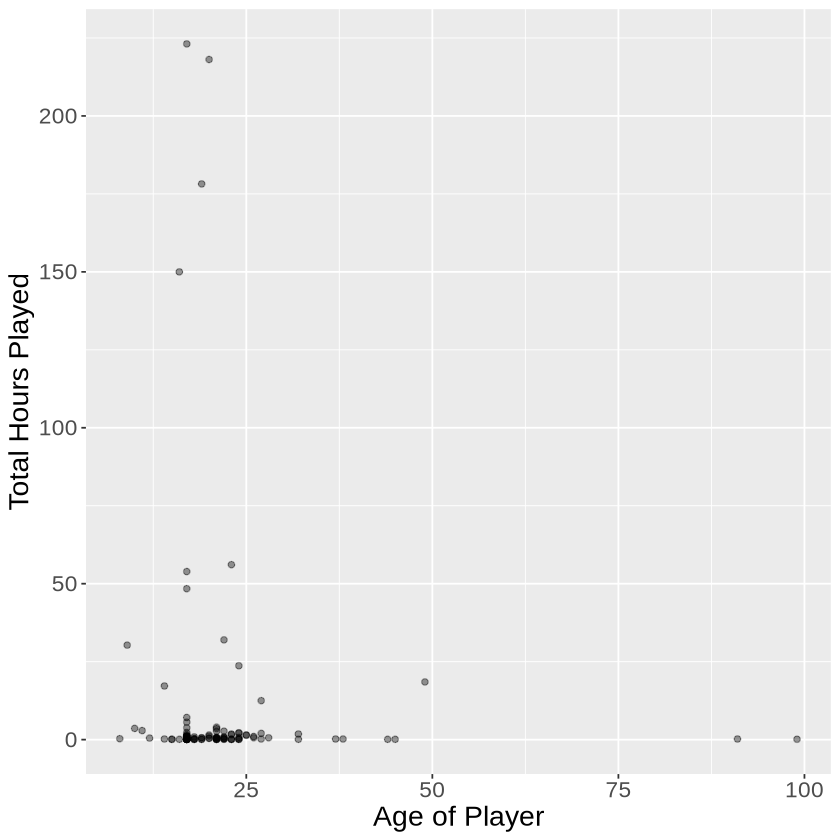

In [6]:
set.seed(411)
url <- "https://raw.githubusercontent.com/dzhen2023/dsci-100-2024w1-group-009-12/refs/heads/main/players.csv"
download.file(url, "players.csv")
players_data <- read_csv("players.csv")
players_data <- players_data |> 
    select(played_hours,age) |>
    filter(played_hours != 0)

head(players_data)

players_plot_age <- players_data |>
    ggplot(aes(x = age, y = played_hours)) +
    geom_point(alpha = 0.4) +
    labs(x = "Age of Player", y = "Total Hours Played") +
     theme(text = element_text(size = 17))

players_plot_age

players_split <- initial_split(players_data, prop = 0.75, strata = played_hours)
players_train <- training(players_split) 
players_test <- testing(players_split)

In [3]:
lm_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")

players_recipe <- recipe(played_hours ~ age, data = players_train)

players_fit <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(lm_spec) |>
    fit(data = players_train)

players_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)          age  
     9.1428      -0.1183  


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,57.564392485
rsq,standard,0.005743024
mae,standard,24.531250051


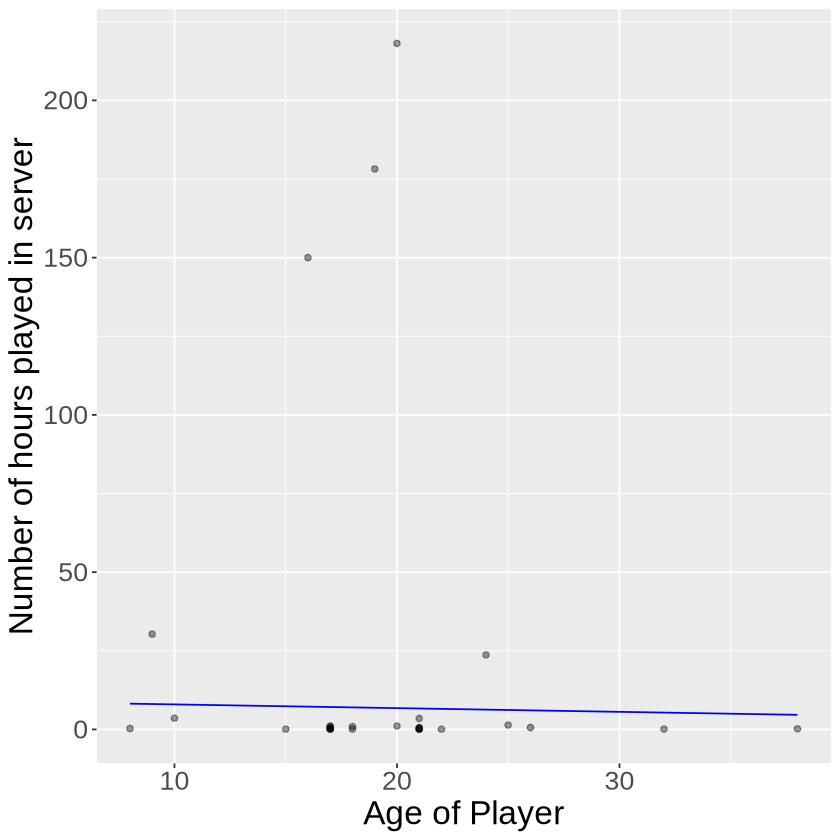

In [4]:
players_pred <- players_fit |>
    predict(players_test) |>
    bind_cols(players_test)

players_test_results <- players_pred |>
    metrics(truth = played_hours, estimate = .pred)
players_test_results

lm_predictions <- players_pred |>
     ggplot(aes(x = age, y = played_hours)) +
        geom_point(alpha = 0.4) +
         geom_line(data = players_pred,
             mapping = aes(x = age, y = .pred), 
            color = "blue") +
         xlab("Age of Player") +
         ylab("Number of hours played in server") +
         theme(text = element_text(size = 20))

lm_predictions